<a href="https://colab.research.google.com/github/Sanskritu/Phishing-Email-Detection-Framework/blob/main/Group_25_NLP_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk pandas scikit-learn tensorflow keras beautifulsoup4
!pip install plotly

In [ ]:
from google.colab import files
!rm -rf ~/.kaggle

files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d wcukierski/enron-email-dataset
!unzip enron-email-dataset.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/wcukierski/enron-email-dataset
License(s): copyright-authors
100% 357M/358M [00:04<00:00, 52.9MB/s]
100% 358M/358M [00:04<00:00, 87.6MB/s]
Archive:  enron-email-dataset.zip
  inflating: emails.csv              


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load only 50,000 rows for processing
emails_df = pd.read_csv('/content/emails.csv', nrows=50000)
emails_df.head()


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def remove_stopwords(text):
    return ' '.join(word for word in nltk.word_tokenize(text) if word.lower() not in stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


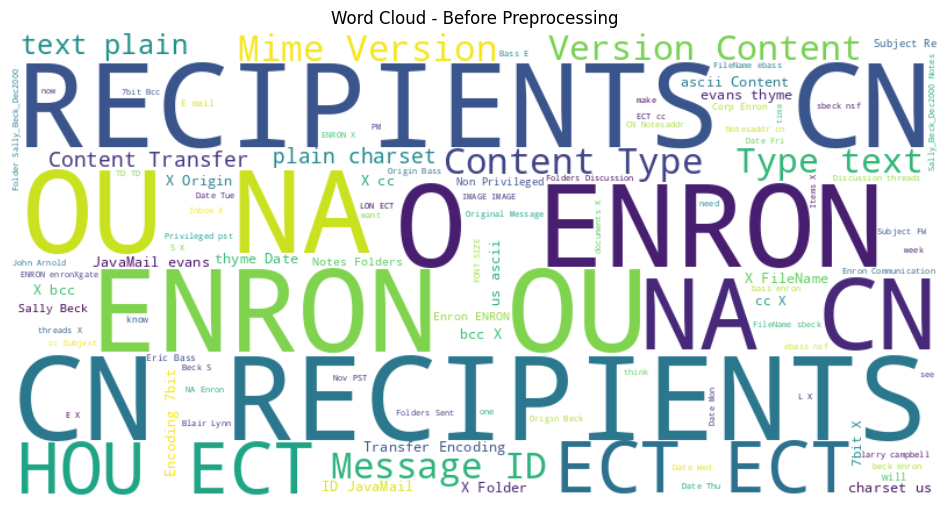

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine raw text
raw_text = ' '.join(emails_df['message'].dropna().astype(str))

plt.figure(figsize=(12, 8))
wordcloud_raw = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(raw_text)
plt.imshow(wordcloud_raw, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Before Preprocessing")
plt.show()


In [ ]:
chunk_size = 2000
processed_data = []

for chunk_start in range(0, 50000, chunk_size):
    batch = emails_df['message'][chunk_start:chunk_start + chunk_size].apply(clean_text)
    # batch = batch.apply(remove_stopwords)
    processed_data.extend(batch)

    # Save intermediate progress to Google Drive
    partial_df = pd.DataFrame({'processed_text': batch})
    partial_df.to_csv(f'/content/drive/MyDrive/enron_emails_partial_{chunk_start}.csv', index=False)
    print(f"Processed rows {chunk_start} to {chunk_start + chunk_size - 1} and saved.")

# Combine all processed chunks into a final DataFrame and save
emails_df = pd.DataFrame({'processed_text': processed_data})
emails_df.to_csv('/content/drive/MyDrive/enron_emails_50k_processed.csv', index=False)


Processed rows 0 to 1999 and saved.
Processed rows 2000 to 3999 and saved.
Processed rows 4000 to 5999 and saved.
Processed rows 6000 to 7999 and saved.
Processed rows 8000 to 9999 and saved.
Processed rows 10000 to 11999 and saved.
Processed rows 12000 to 13999 and saved.
Processed rows 14000 to 15999 and saved.
Processed rows 16000 to 17999 and saved.
Processed rows 18000 to 19999 and saved.
Processed rows 20000 to 21999 and saved.
Processed rows 22000 to 23999 and saved.
Processed rows 24000 to 25999 and saved.
Processed rows 26000 to 27999 and saved.
Processed rows 28000 to 29999 and saved.
Processed rows 30000 to 31999 and saved.
Processed rows 32000 to 33999 and saved.
Processed rows 34000 to 35999 and saved.
Processed rows 36000 to 37999 and saved.
Processed rows 38000 to 39999 and saved.
Processed rows 40000 to 41999 and saved.
Processed rows 42000 to 43999 and saved.
Processed rows 44000 to 45999 and saved.
Processed rows 46000 to 47999 and saved.
Processed rows 48000 to 49999

In [ ]:
# import glob

# # Load all saved intermediate files from Google Drive
# file_list = glob.glob('/content/drive/MyDrive/enron_emails_partial_*.csv')
# processed_parts = [pd.read_csv(file) for file in file_list]

# # Concatenate all loaded chunks
# emails_df = pd.concat(processed_parts, ignore_index=True)
# print("Loaded intermediate results from Google Drive.")


In [ ]:
print(emails_df.head())

                                      processed_text
0  Message ID Date Mon 14 May 2001 16 39 00 0700 ...
1  Message ID Date Fri 4 May 2001 13 51 00 0700 P...
2  Message ID Date Wed 18 Oct 2000 03 00 00 0700 ...
3  Message ID Date Mon 23 Oct 2000 06 13 00 0700 ...
4  Message ID Date Thu 31 Aug 2000 05 07 00 0700 ...


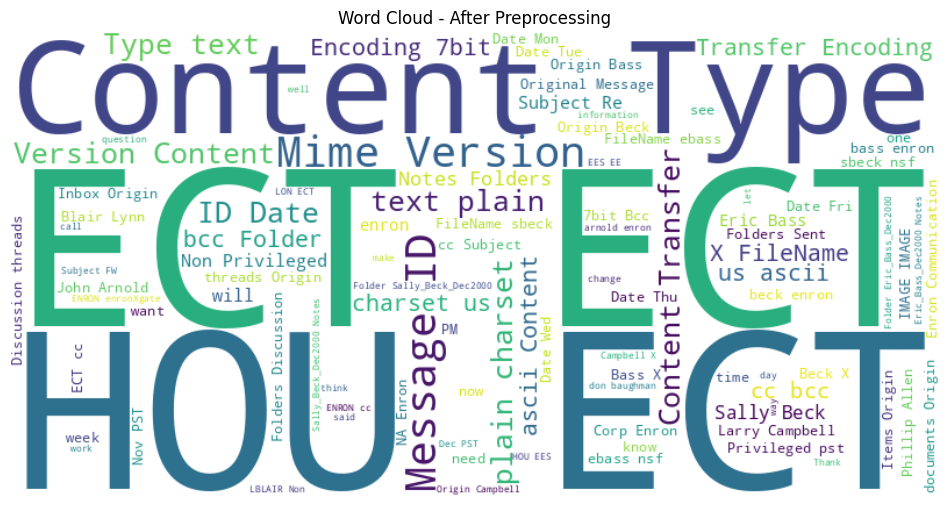

In [ ]:
processed_text = ' '.join(emails_df['processed_text'].dropna().astype(str))

plt.figure(figsize=(12, 8))
wordcloud_processed = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(processed_text)
plt.imshow(wordcloud_processed, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - After Preprocessing")
plt.show()


In [ ]:
# Feature Extraction: checking if 'bank', 'login', or 'password' keywords are present
emails_df['contains_phishing_keywords'] = emails_df['processed_text'].apply(lambda x: 1 if any(word in x for word in ['bank', 'login', 'password', 'account']) else 0)
emails_df[['processed_text', 'contains_phishing_keywords']].head()


,processed_text,contains_phishing_keywords
0,Message ID Date Mon 14 May 2001 16 39 00 0700 ...,0
1,Message ID Date Fri 4 May 2001 13 51 00 0700 P...,0
2,Message ID Date Wed 18 Oct 2000 03 00 00 0700 ...,0
3,Message ID Date Mon 23 Oct 2000 06 13 00 0700 ...,0
4,Message ID Date Thu 31 Aug 2000 05 07 00 0700 ...,0


In [ ]:
import plotly.express as px

print(emails_df.columns)

# # Treemap
# fig = px.treemap(feature_counts, path=['Feature'], values='Count', title="Treemap of Feature Counts")
# fig.show()


Index(['processed_text', 'contains_phishing_keywords'], dtype='object')


In [ ]:
from collections import Counter
import re

# Extract top keywords
keywords = emails_df['processed_text'].str.findall(r'\bbank\b|\blogin\b|\bpassword\b|\baccount\b')
keywords_flat = [item for sublist in keywords for item in sublist]
top_keywords = Counter(keywords_flat).most_common(5)

# Extract top link domains
links = emails_df['processed_text'].str.findall(r'http\S+|www.\S+')
domains = [re.findall(r'://(?:www\.)?([^/]+)', link)[0] if re.findall(r'://(?:www\.)?([^/]+)', link) else 'Unknown' for sublist in links for link in sublist]
top_domains = Counter(domains).most_common(5)

# Extract attachment-related terms (basic counting)
attachments = emails_df['processed_text'].str.findall(r'attachment|attached|pdf|doc|invoice')
attachments_flat = [item for sublist in attachments for item in sublist]
top_attachments = Counter(attachments_flat).most_common(5)

# Convert to DataFrame for visualization
features_data = pd.DataFrame({
    'Category': ['Keyword'] * len(top_keywords) + ['Link Domain'] * len(top_domains) + ['Attachment'] * len(top_attachments),
    'Term': [term for term, count in top_keywords + top_domains + top_attachments],
    'Frequency': [count for term, count in top_keywords + top_domains + top_attachments]
})


In [ ]:
import plotly.express as px

# Sunburst chart for top terms by category
fig = px.sunburst(features_data, path=['Category', 'Term'], values='Frequency',
                  title="Sunburst of Top Keywords, Link Domains, and Attachment Terms")
fig.show()


In [ ]:
fig = px.pie(features_data, names='Category', values='Frequency', hole=0.4,
             title="Distribution of Features by Category")
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1 indicates phishing and 0 otherwise
emails_df['label'] = emails_df['contains_phishing_keywords']  # Using the keyword feature as a label

# Split data
X_train, X_test, y_train, y_test = train_test_split(emails_df['processed_text'], emails_df['label'], test_size=0.2, random_state=42)

# Simple TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9745
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9095
           1       0.98      0.73      0.84       905

    accuracy                           0.97     10000
   macro avg       0.98      0.87      0.91     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model, '/content/drive/MyDrive/phishing_model_rf.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/tfidf_vectorizer.pkl')
print("Model and vectorizer saved to Google Drive.")


Model and vectorizer saved to Google Drive.


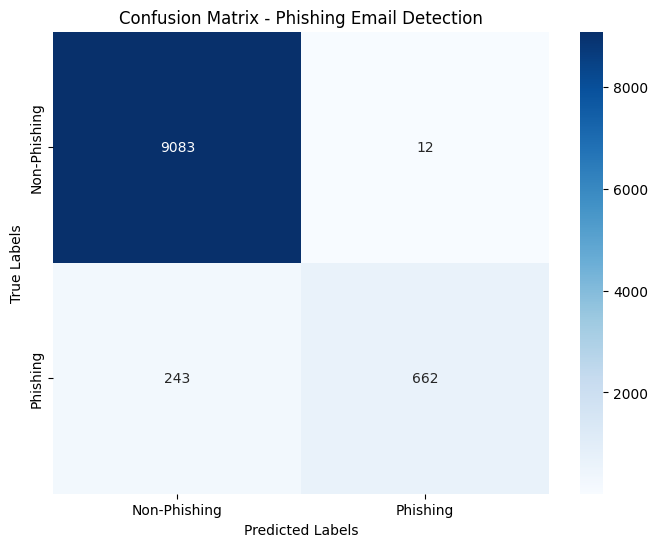

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Phishing", "Phishing"], yticklabels=["Non-Phishing", "Phishing"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Phishing Email Detection")
plt.show()

# Visualization of Feature Distributions
# Ensure 'link_count' and 'keyword_count' exist in the dataset before running these


In [ ]:

# Distribution of Links in Emails
if 'link_count' in emails_df.columns:
    plt.figure(figsize=(9,4))
    sns.histplot(data=emails_df, x='link_count', kde=True, color='purple')
    plt.title("Distribution of Links in Emails")
    plt.xlabel("Number of Links")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("'link_count' column not found in dataset.")




'link_count' column not found in dataset.


In [ ]:
# Distribution of Phishing Keywords in Emails
if 'keyword_count' in emails_df.columns:
    plt.figure(figsize=(9, 2))
    sns.histplot(data=emails_df, x='keyword_count', kde=True, color='orange')
    plt.title("Distribution of Phishing Keywords in Emails")
    plt.xlabel("Number of Phishing Keywords")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("'keyword_count' column not found in dataset.")

'keyword_count' column not found in dataset.


In [ ]:
import re
import pandas as pd
import joblib
import nltk
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load saved model and vectorizer
model = joblib.load('/content/drive/MyDrive/phishing_model_rf.pkl')
vectorizer = joblib.load('/content/drive/MyDrive/tfidf_vectorizer.pkl')
stop_words = set(stopwords.words('english'))

# Text Preprocessing
def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# def remove_stopwords(text):
#     return ' '.join(word for word in nltk.word_tokenize(text) if word.lower() not in stop_words)

def preprocess_new_email(raw_email):
    processed_text = clean_text(raw_email)
    # processed_text = remove_stopwords(cleaned_text)
    return processed_text

# Feature Extraction
def extract_features_from_new_email(processed_text):
    features = {
        "contains_phishing_keywords": int(any(word in processed_text for word in ["bank", "login", "password", "account"]))
    }
    return pd.Series(features)

# Predict Phishing
def predict_phishing(new_email_text):
    processed_text = preprocess_new_email(new_email_text)
    features = extract_features_from_new_email(processed_text)
    tfidf_features = vectorizer.transform([processed_text])  # Transforming text with TF-IDF
    prediction = model.predict(tfidf_features)
    return "Phishing" if prediction[0] == 1 else "Not Phishing"

# Enter your raw email here (as a string)
raw_email = """
Hey Sans,
Get ready for an explosive finale to 2024! We’re pulling out all the stops, and you won’t want to miss a second of it. Here’s the lowdown on massive Web3 hackathons closing out the year and an opportunity to help shape the Web3 landscape.

ETHIndia 2024
(In-person, Dec 6 - 8, 2024)

Building up on last year's phenomenal success with 480+ projects submitted and thousands of attendees in-person, ETHIndia ’24 is gearing up to be an infinite playground for builders. Here’s why you NEED to be there:

Learn-and-earn: Over the years, ETHIndia has had thousands of dollars in prizes from heavyweights like Polygon, Base, Filecoin, 1Inch, Scroll, and more. We’ll be revealing this year’s partner lineup super soon.

A space for everyone: Whether you are breaking into blockchain for the first time or are an OG builder, everyone’s welcome. Come as you are, leave better.

Build alongside THE best: You’ll be building alongside speakers, mentors, and judges, including Web3 veterans who've been long building the foundations we’re taking forward today. (Lineup to be revealed soon!)

Infinite opportunities: ETHIndia = the convergence of the global Ethereum ecosystem in India. The space will have the brightest minds, game-changing ideas, and infinite inspiration. Collaborate with pro builders or pitch your boldest vision to the titans of Web3—this is your moment. Check out 2023’s highlight to get a feel for yourself: https://x.com/ETHIndiaco/status/1754497639499067856

Apply now: ethindia.co


Unfold 2024 by CoinDCX
(In-person, Dec 1 - 2, 2024)

India’s premier multi-chain hackathon returns for its third edition! Hosted by CoinDCX, Unfold 2024 will be 36 hours of non-stop building, learning, and networking—with a complimentary stay at Marriott, Bengaluru. With thousands of dollars in prizes, backed by heavyweights like Polygon, Aptos, Sui, and more to come, your big ideas meet even bigger opportunities. If you’re a developer who wants to build projects AND showcase them to investors at the forefront of Web3, you shouldn't miss out!

Apply now: https://unfold2024.devfolio.co/


Building from India? Take the Survey for India Web3 Landscape Report 2024

Hashed Emergent and Devfolio are putting together the India Web3 Landscape Report, and if you’re a builder based in India, we need your voice. Help map out the ecosystem, share your insights, and get a chance to win:

Free tickets and discount codes for India Blockchain Week (IBW) Conference

Power banks and Bluetooth speakers

Take the survey here: https://forms.gle/9DVcjSpsv7ELgKzt8

The stage is set, the spotlight is on you, and 2024 is just getting started. Carpe Diem.

"""
# Run Prediction
result = predict_phishing(raw_email)
print("Prediction:", result)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Prediction: Phishing
